In [1]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.shape

(81, 4)

In [7]:
df['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

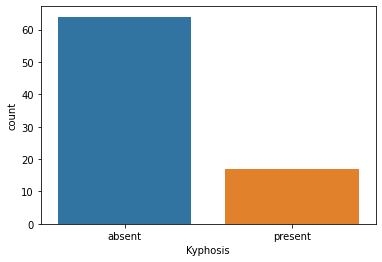

In [8]:
sns.countplot(df['Kyphosis'])

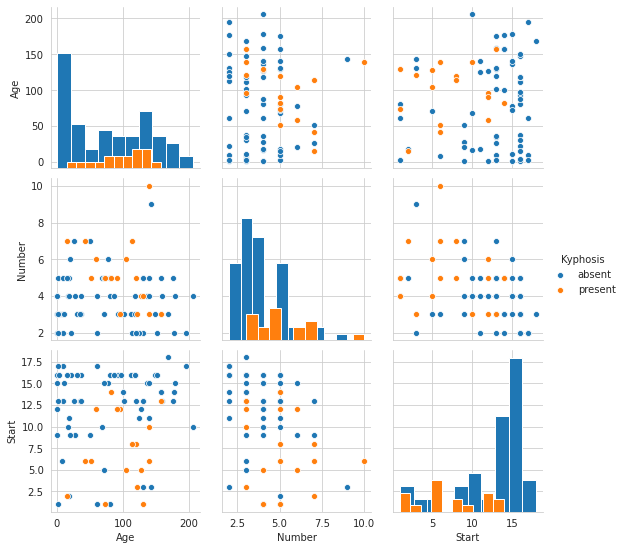

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Kyphosis', diag_kind = 'hist')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, y_pred))

[[16  3]
 [ 3  3]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.84      0.84      0.84        19
     present       0.50      0.50      0.50         6

    accuracy                           0.76        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.76      0.76      0.76        25



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators = 200)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))

[[18  1]
 [ 4  2]]


In [25]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

